In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2020-10-09 16:34:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   155KB/s    in 0.5s    

2020-10-09 16:34:28 (155 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [8]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [9]:
df.head()

,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,FuelType,Fuel ConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,FuelConsumptionComb(mpg),CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.describe()

,EngineSize,Cylinders,Fuel ConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,FuelConsumptionComb(mpg),CO2Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Lets make another dataframe with our necessaries column

In [11]:
cdf = df[['EngineSize','Cylinders','FuelConsumptionComb','CO2Emissions']]

In [12]:
cdf.head()

,EngineSize,Cylinders,FuelConsumptionComb,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## lets visualize each of the column

In [13]:
viz = cdf[['EngineSize','Cylinders','FuelConsumptionComb','CO2Emissions']]

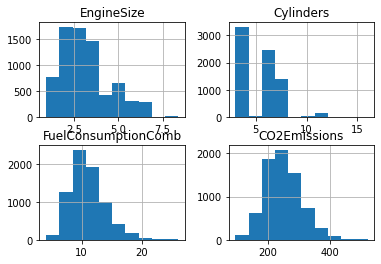

In [14]:
viz.hist()
plt.show()

## Now we will see some linear regression relation between X vs. Y, like Engine size Vs. Co2 emissioons, etc.

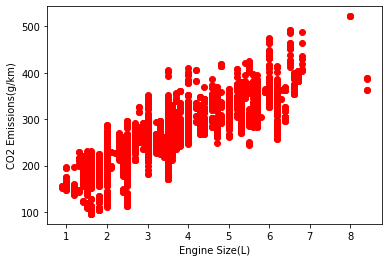

In [15]:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions, color='red')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [52]:
# lets see linear relation between cylinders anb co2 emissions

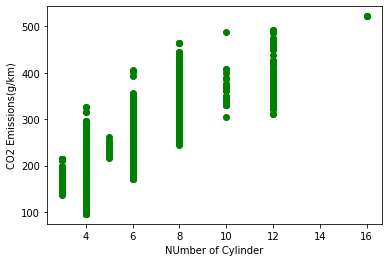

In [16]:
plt.scatter(cdf.Cylinders, cdf.CO2Emissions, color='green')
plt.xlabel('NUmber of Cylinder')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively,
which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset 
is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test 
with! And since this data has not been used to train the model, the model has no knowledge of the 
outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% 
for testing. We create a mask to select random rows using **np.random.rand()** function: 

In [24]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


#### At first train data with x and y variables

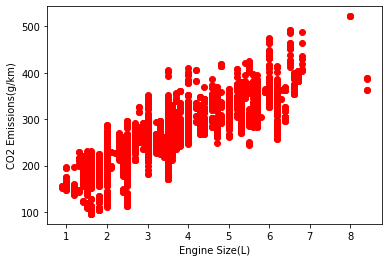

In [25]:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions, color='red')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

#### Now modeling the dataframe using scikit learning, sklearn

In [26]:
from sklearn import linear_model

In [27]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['EngineSize']])
train_y = np.asanyarray(train[['CO2Emissions']])
regr.fit(train_x, train_y)
# The coeeficient
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[36.72586924]]
Intercept:  [134.86442275]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


Text(0, 0.5, 'CO2 Emissions(g/km)')

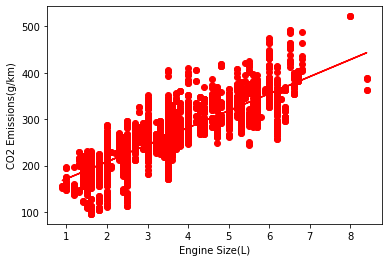

In [28]:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions, color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')

In [29]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['EngineSize']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.64
Residual sum of squares (MSE): 984.41
R2-score: 0.60


## Our R2 score is 0.60. THis is good. But the higher it is, best fit on the data. The best value of R2 = 1